In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [17]:
df = pd.read_csv('../data/raw/vehicle_maintenance_data.csv')
df.head()

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,Truck,58765,Good,0,4,Electric,Automatic,2000,28524,2023-11-23,2025-06-24,Second,20782,6,3,13.622204,New,New,Weak,1
1,Van,60353,Average,1,7,Electric,Automatic,2500,133630,2023-09-21,2025-06-04,Second,23489,7,0,13.625307,New,New,Weak,1
2,Bus,68072,Poor,0,2,Electric,Automatic,1500,34022,2023-06-27,2025-04-27,First,17979,7,0,14.306302,New,Good,Weak,1
3,Bus,60849,Average,4,5,Petrol,Automatic,2500,81636,2023-08-24,2025-11-05,Second,6220,7,3,18.709467,New,Worn Out,New,1
4,Bus,45742,Poor,5,1,Petrol,Manual,2000,97162,2023-05-25,2025-09-14,Third,16446,6,2,16.977482,Good,Good,Weak,1


In [18]:
print('Shape:', df.shape)
print()
df.info()

Shape: (50000, 20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Vehicle_Model         50000 non-null  object 
 1   Mileage               50000 non-null  int64  
 2   Maintenance_History   50000 non-null  object 
 3   Reported_Issues       50000 non-null  int64  
 4   Vehicle_Age           50000 non-null  int64  
 5   Fuel_Type             50000 non-null  object 
 6   Transmission_Type     50000 non-null  object 
 7   Engine_Size           50000 non-null  int64  
 8   Odometer_Reading      50000 non-null  int64  
 9   Last_Service_Date     50000 non-null  object 
 10  Warranty_Expiry_Date  50000 non-null  object 
 11  Owner_Type            50000 non-null  object 
 12  Insurance_Premium     50000 non-null  int64  
 13  Service_History       50000 non-null  int64  
 14  Accident_History      50000 non-null  int64  
 15 

In [19]:
# checking for null values
df.isna().sum()

Vehicle_Model           0
Mileage                 0
Maintenance_History     0
Reported_Issues         0
Vehicle_Age             0
Fuel_Type               0
Transmission_Type       0
Engine_Size             0
Odometer_Reading        0
Last_Service_Date       0
Warranty_Expiry_Date    0
Owner_Type              0
Insurance_Premium       0
Service_History         0
Accident_History        0
Fuel_Efficiency         0
Tire_Condition          0
Brake_Condition         0
Battery_Status          0
Need_Maintenance        0
dtype: int64

In [20]:
df.dtypes

Vehicle_Model            object
Mileage                   int64
Maintenance_History      object
Reported_Issues           int64
Vehicle_Age               int64
Fuel_Type                object
Transmission_Type        object
Engine_Size               int64
Odometer_Reading          int64
Last_Service_Date        object
Warranty_Expiry_Date     object
Owner_Type               object
Insurance_Premium         int64
Service_History           int64
Accident_History          int64
Fuel_Efficiency         float64
Tire_Condition           object
Brake_Condition          object
Battery_Status           object
Need_Maintenance          int64
dtype: object

In [21]:

non_num_cols = df.select_dtypes(include=['object']).columns
for col in non_num_cols:
  print(col , df[col].unique())
  print()

Vehicle_Model ['Truck' 'Van' 'Bus' 'Motorcycle' 'SUV' 'Car']

Maintenance_History ['Good' 'Average' 'Poor']

Fuel_Type ['Electric' 'Petrol' 'Diesel']

Transmission_Type ['Automatic' 'Manual']

Last_Service_Date ['2023-11-23' '2023-09-21' '2023-06-27' '2023-08-24' '2023-05-25'
 '2023-08-12' '2024-01-13' '2023-05-12' '2023-04-07' '2023-08-05'
 '2023-11-08' '2023-07-03' '2024-02-19' '2023-04-11' '2023-05-07'
 '2023-09-17' '2023-11-24' '2023-09-23' '2024-01-23' '2023-06-15'
 '2023-07-14' '2023-04-30' '2023-06-12' '2023-12-10' '2023-10-25'
 '2023-10-27' '2023-05-22' '2023-12-22' '2023-09-04' '2024-01-09'
 '2023-06-29' '2023-11-19' '2023-08-19' '2023-06-07' '2023-12-31'
 '2023-08-31' '2024-02-11' '2023-10-17' '2024-02-16' '2023-10-15'
 '2023-11-01' '2023-08-20' '2023-06-26' '2023-09-27' '2023-11-06'
 '2023-10-26' '2023-05-30' '2023-04-14' '2023-11-17' '2023-05-15'
 '2023-12-09' '2023-09-08' '2024-02-23' '2023-08-23' '2023-09-26'
 '2023-10-11' '2024-02-22' '2023-05-31' '2023-09-05' '2024-01-0

In [22]:
# check target distribution
print(df['Need_Maintenance'].value_counts())
print()
print('% of class 1:', round(df['Need_Maintenance'].mean()*100, 2))

Need_Maintenance
1    40498
0     9502
Name: count, dtype: int64

% of class 1: 81.0


In [24]:

ref_date = pd.to_datetime('2024-03-01')

df['Last_Service_Date'] = pd.to_datetime(df['Last_Service_Date'])
df['Warranty_Expiry_Date'] = pd.to_datetime(df['Warranty_Expiry_Date'])

df['Days_Since_Service'] = (ref_date - df['Last_Service_Date']).dt.days
df['Warranty_Remaining'] = (df['Warranty_Expiry_Date'] - ref_date).dt.days

# drop the original date cols now
df.drop(['Last_Service_Date', 'Warranty_Expiry_Date'], axis=1, inplace=True)

print('New columns added:')
print(df[['Days_Since_Service', 'Warranty_Remaining']].head())

New columns added:
   Days_Since_Service  Warranty_Remaining
0                  99                 480
1                 162                 460
2                 248                 422
3                 190                 614
4                 281                 562


In [25]:
# One hot encoding for Vehicle_Model and Fuel_Type since they dont have ordering
df = pd.get_dummies(df, columns=['Vehicle_Model', 'Fuel_Type'], drop_first=True)
df.head()

,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Transmission_Type,Engine_Size,Odometer_Reading,Owner_Type,Insurance_Premium,Service_History,...,Need_Maintenance,Days_Since_Service,Warranty_Remaining,Vehicle_Model_Car,Vehicle_Model_Motorcycle,Vehicle_Model_SUV,Vehicle_Model_Truck,Vehicle_Model_Van,Fuel_Type_Electric,Fuel_Type_Petrol
0,58765,1,0,4,0,2000,28524,1,20782,6,...,1,99,480,False,False,False,True,False,True,False
1,60353,0,1,7,0,2500,133630,1,23489,7,...,1,162,460,False,False,False,False,True,True,False
2,68072,2,0,2,0,1500,34022,0,17979,7,...,1,248,422,False,False,False,False,False,True,False
3,60849,0,4,5,0,2500,81636,1,6220,7,...,1,190,614,False,False,False,False,False,False,True
4,45742,2,5,1,1,2000,97162,2,16446,6,...,1,281,562,False,False,False,False,False,False,True


In [26]:
df.dtypes

Mileage                       int64
Maintenance_History           int64
Reported_Issues               int64
Vehicle_Age                   int64
Transmission_Type             int64
Engine_Size                   int64
Odometer_Reading              int64
Owner_Type                    int64
Insurance_Premium             int64
Service_History               int64
Accident_History              int64
Fuel_Efficiency             float64
Tire_Condition                int64
Brake_Condition               int64
Battery_Status                int64
Need_Maintenance              int64
Days_Since_Service            int64
Warranty_Remaining            int64
Vehicle_Model_Car              bool
Vehicle_Model_Motorcycle       bool
Vehicle_Model_SUV              bool
Vehicle_Model_Truck            bool
Vehicle_Model_Van              bool
Fuel_Type_Electric             bool
Fuel_Type_Petrol               bool
dtype: object

In [27]:
# split features and target
X = df.drop('Need_Maintenance', axis=1)
y = df['Need_Maintenance']

print('Features shape:', X.shape)
print('Target shape:', y.shape)

Features shape: (50000, 24)
Target shape: (50000,)


In [28]:
# train test split - 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training set:', X_train.shape)
print('Test set:', X_test.shape)

Training set: (40000, 24)
Test set: (10000, 24)


## Logistic Regression

In [29]:
# training logistic regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

print('Model trained successfully')

Model trained successfully


/Users/abhimansingh/Desktop/Gen-Ai-Projecty/VEHICLE-MAINTENACE-AI/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# predictions
log_pred = log_model.predict(X_test)

# accuracy
log_acc = accuracy_score(y_test, log_pred)
print('Logistic Regression Accuracy:', round(log_acc * 100, 2), '%')
print()

# classification report
print('Classification Report:')
print(classification_report(y_test, log_pred))

Logistic Regression Accuracy: 85.35 %

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.46      0.55      1915
           1       0.88      0.95      0.91      8085

    accuracy                           0.85     10000
   macro avg       0.78      0.70      0.73     10000
weighted avg       0.84      0.85      0.84     10000



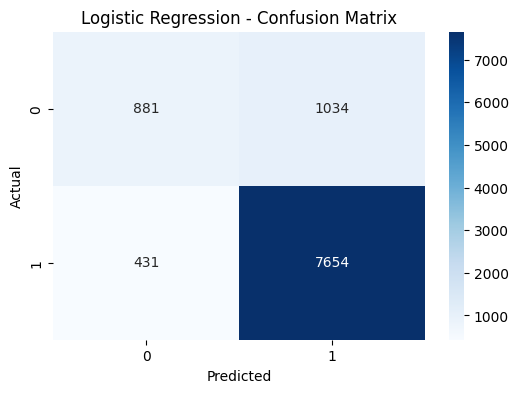

In [31]:
# confusion matrix for logistic regression
cm_log = confusion_matrix(y_test, log_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Decision Tree Classifier

In [32]:
# training decision tree
dt_model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=500,
    min_samples_leaf=200,
    ccp_alpha=0.005,
    random_state=42
)
dt_model.fit(X_train, y_train)

print('Decision Tree trained')

Decision Tree trained


In [33]:
# predictions
dt_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
print('Decision Tree Accuracy:', round(dt_acc * 100, 2), '%')
print()

print('Classification Report:')
print(classification_report(y_test, dt_pred))

Decision Tree Accuracy: 96.38 %

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1915
           1       1.00      0.96      0.98      8085

    accuracy                           0.96     10000
   macro avg       0.92      0.98      0.95     10000
weighted avg       0.97      0.96      0.96     10000



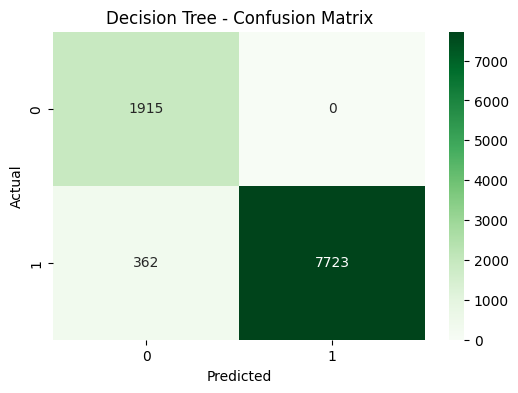

In [34]:
# confusion matrix for decision tree
cm_dt = confusion_matrix(y_test, dt_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Comparing both models

In [35]:
# side by side comparison
print('='*40)
print('Model Comparison')
print('='*40)
print(f'Logistic Regression : {round(log_acc*100, 2)}%')
print(f'Decision Tree       : {round(dt_acc*100, 2)}%')
print('='*40)

if dt_acc > log_acc:
    print('Decision Tree performed better')
else:
    print('Logistic Regression performed better')

Model Comparison
Logistic Regression : 85.35%
Decision Tree       : 96.38%
Decision Tree performed better


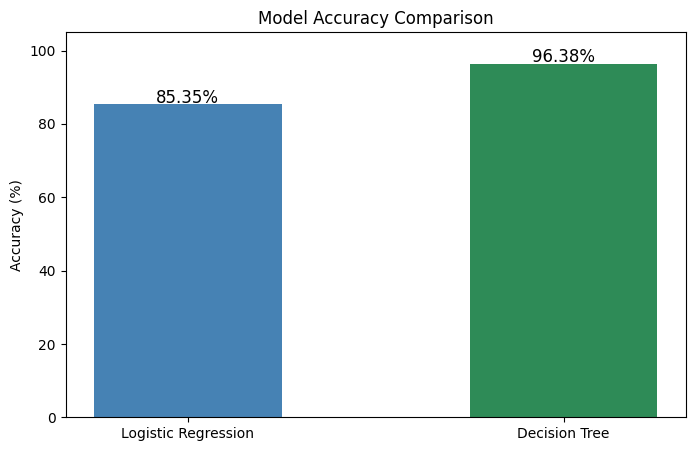

In [36]:
# plotting comparison
models = ['Logistic Regression', 'Decision Tree']
scores = [log_acc * 100, dt_acc * 100]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, scores, color=['steelblue', 'seagreen'], width=0.5)

# adding value labels on bars
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{score:.2f}%', ha='center', fontsize=12)

plt.ylim(0, 105)
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.show()

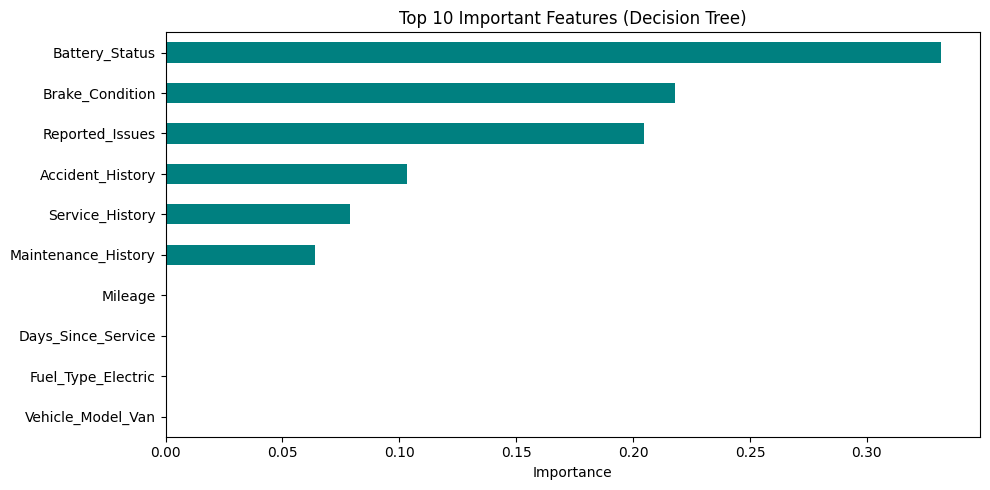

In [37]:
# feature importance from decision tree - which features matter most
feat_imp = pd.Series(dt_model.feature_importances_, index=X.columns)
feat_imp = feat_imp.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
feat_imp.plot(kind='barh', color='teal')
plt.title('Top 10 Important Features (Decision Tree)')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [38]:
# saving both models
import joblib

joblib.dump(log_model, 'logistic_model.pkl')
joblib.dump(dt_model, 'decision_tree_model.pkl')

print('Both models saved!')

Both models saved!


In [ ]:
# Import train.py for preprocessing and training
import sys
sys.path.append('..')
from train import preprocess, engineer_dates, load_data, PROCESSED_CSV
 
# Load preprocessed data for analysis
df = load_data(PROCESSED_CSV)
print(df.head())